In [1]:
# import necessary libraries
from PCAfold import VQPCA
import matplotlib.pyplot as plt
import numpy as np

## First test of library

| It.   | Rec. error      | Error conv.? | Cent. conv.? | Cluster 1  | Cluster 2  | Cluster 3  | Time [min]   |
| 1     | 0.15002697      | False        | False        | 45         | 100        | 155        | 4e-05        |
| 2     | 0.00510118      | False        | False        | 93         | 100        | 107        | 7e-05        |
| 3     | 0.00469744      | False        | False        | 97         | 100        | 103        | 9e-05        |
| 4     | 0.00383158      | False        | False        | 96         | 100        | 104        | 0.00012      |
| 5     | 0.00310079      | False        | False        | 97         | 100        | 103        | 0.00015      |
| 6     | 0.00216331      | False        | False        | 99         | 100        | 101        | 0.00017      |
| 7     | 0.00069737      | False        | False        | 100        | 100        | 100        | 0.00021      |
| 8     | 0.00022497      | False        | True         | 100        | 100        | 100        | 0.00023

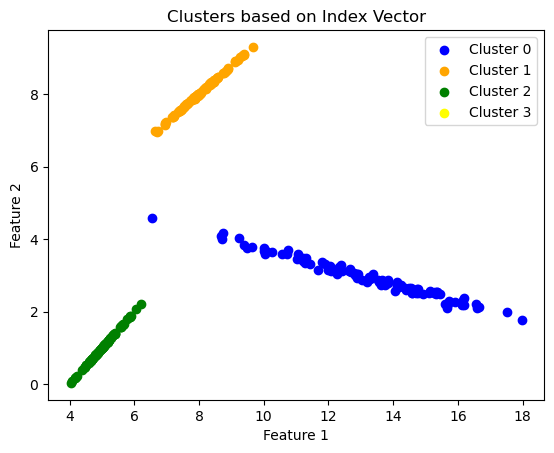

In [13]:
n_points = 100

# Parameters for cluster 1
mean_local_1 = [5, 1]
covariance_local_1 = np.array([[0.3, 0.3], [0.3, 0.3]])  # Swap off-diagonal elements
covariance_local_1 = np.dot(covariance_local_1, covariance_local_1.T)

# Parameters for cluster 2
mean_local_2 = [13, 3]
covariance_local_2 = np.array([[0.3, -2], [0, 0.5]])  # Swap off-diagonal elements
covariance_local_2 = np.dot(covariance_local_2, covariance_local_2.T)

# Parameters for cluster 3
mean_local_3 = [8, 8]
covariance_local_3 = np.array([[0.5, 0.4], [0.4, 0.3]])  # Set off-diagonal element to 0
covariance_local_3 = np.dot(covariance_local_3, covariance_local_3.T)

# Generate samples for each cluster
x_noise_1, y_noise_1 = np.random.multivariate_normal(mean_local_1, covariance_local_1, n_points).T
x_noise_2, y_noise_2 = np.random.multivariate_normal(mean_local_2, covariance_local_2, n_points).T
x_noise_3, y_noise_3 = np.random.multivariate_normal(mean_local_3, covariance_local_3, n_points).T

# Concatenate the data points
x_local = np.concatenate([x_noise_1, x_noise_2, x_noise_3])
y_local = np.concatenate([y_noise_1, y_noise_2, y_noise_3])

Dataset_local = np.hstack((x_local[:, np.newaxis], y_local[:, np.newaxis]))

# Instantiate VQPCA class object:
vqpca = VQPCA(
    Dataset_local,
    n_clusters=3,
    n_components=1,
    scaling='std',
    idx_init='random',
    random_state=42,
    max_iter=100,
    tolerance=1.0e-08,
    verbose=True
)

# Access the VQPCA clustering solution:
idx = vqpca.idx
pcs = vqpca.A
#print(pcs)

# Separate data points based on cluster index
cluster_0 = Dataset_local[idx == 0]
cluster_1 = Dataset_local[idx == 1]
cluster_2 = Dataset_local[idx == 2]
cluster_3 = Dataset_local[idx == 3]

# Plot the clusters
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], label='Cluster 0', color='blue')
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], label='Cluster 1', color='orange')
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], label='Cluster 2', color='green')
plt.scatter(cluster_3[:, 0], cluster_3[:, 1], label='Cluster 3', color='yellow')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters based on Index Vector')

# Show legend
plt.legend()

# Show the plot
plt.show()